Dear Participant,

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Use the provided dataset in order to do your analysis.

#Attribute Information:

#Matrix column entries (attributes):
#name - ASCII subject name and recording number
#MDVP:Fo(Hz) - Average vocal fundamental frequency
#MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
#MDVP:Flo(Hz) - Minimum vocal fundamental frequency
#MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
#measures of variation in fundamental frequency
#MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
#NHR,HNR - Two measures of ratio of noise to tonal components in the voice
#status - Health status of the subject (one) - Parkinson's, (zero) - healthy
#RPDE,D2 - Two nonlinear dynamical complexity measures
#DFA - Signal fractal scaling exponent
#spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [123]:
# Import required library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Q1. Load the dataset

In [124]:
df=pd.read_csv('C:\\Python_Training\\Python_Labs\\SLC\\Mini Project\\SLC Miniproject\\SLC Miniproject\\parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [125]:
df.shape

(195, 24)

In [126]:
df['name'].nunique()

195

### Q2. Use the .describe() method on the dataset and state any insights you may come across.

In [127]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


Observations about #MDVP:Fo(Hz) - Average vocal fundamental frequency
1)Minimum average fundamental frequency is 88.33 Hz 
2)Maximum Average Fundamental frequency is 260.10.
3)75 % people have Average vocal fundamental frequency less than 182.76
4)since mean>median, it is a right skewed distribution with high outliers.

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

## Q3. Check for class imbalance. Do people with Parkinson's have greater representation in the dataset?

In [129]:
a=df['status'].value_counts()
a

1    147
0     48
Name: status, dtype: int64

In [130]:
a.iloc[0]

147

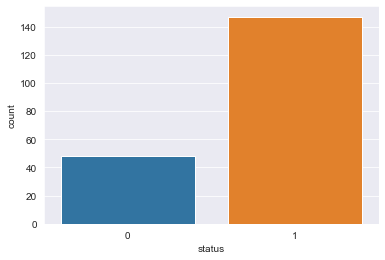

In [131]:
sns.countplot('status',data=df)
plt.show()

In [132]:
print('% of people having parkinson:',a.iloc[0]/np.sum(a))
print('% of people not having parkinson:',a.iloc[1]/np.sum(a))

% of people having parkinson: 0.7538461538461538
% of people not having parkinson: 0.24615384615384617


In [133]:
# Conclusion:people with Parkinson's have greater representation in the dataset

### Q4. Check for missing vaues and take necessary measures by dropping observation or imputing them.

In [134]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [135]:
# No null values

### Q5. Plot the distribution of all the features. State any observations you can make based on the distribution plots.

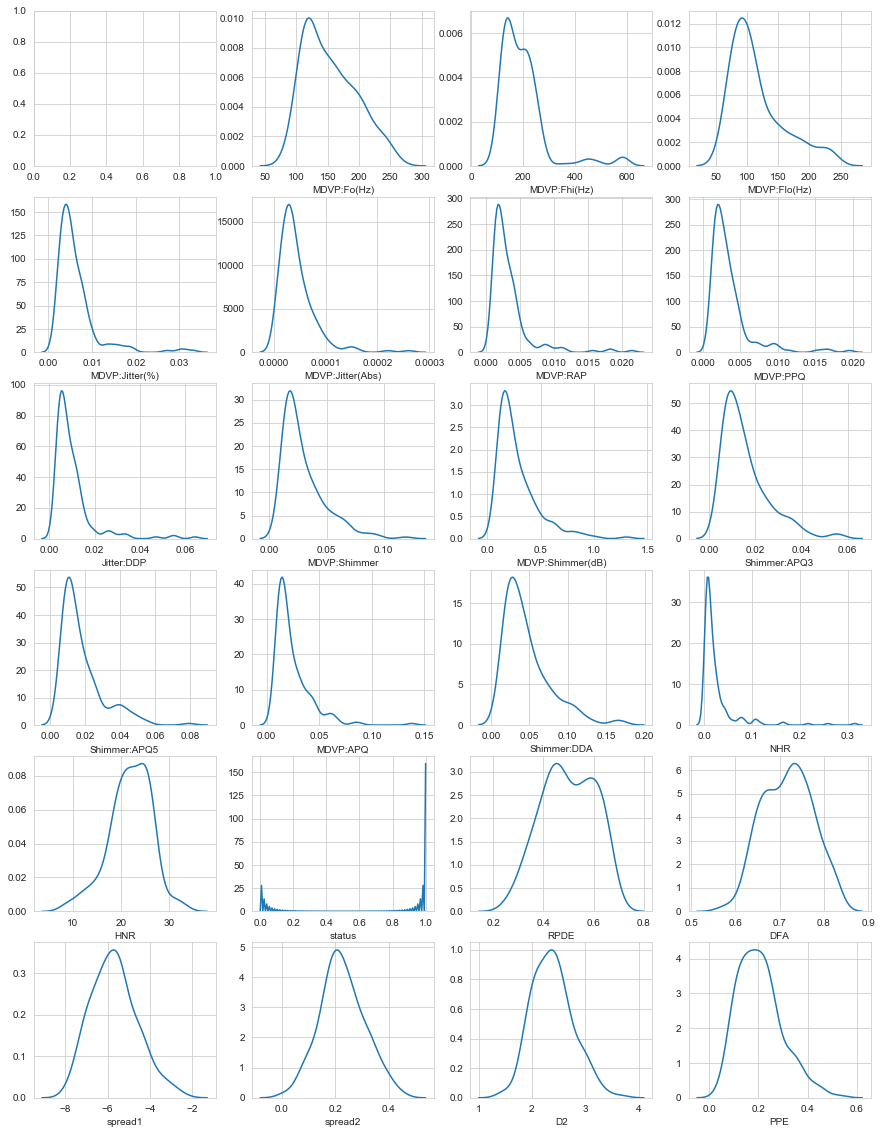

In [136]:
sns.set_style('whitegrid')
fig,axes=plt.subplots(6,4,figsize=(15,20))
axes=axes.flatten()

for i in range(1,len(df.columns)):
    sns.distplot(df.iloc[:,i],hist=False,ax=axes[i])

### Q6. Check for outliers in the data. Are there any variables with high amount of outliers.

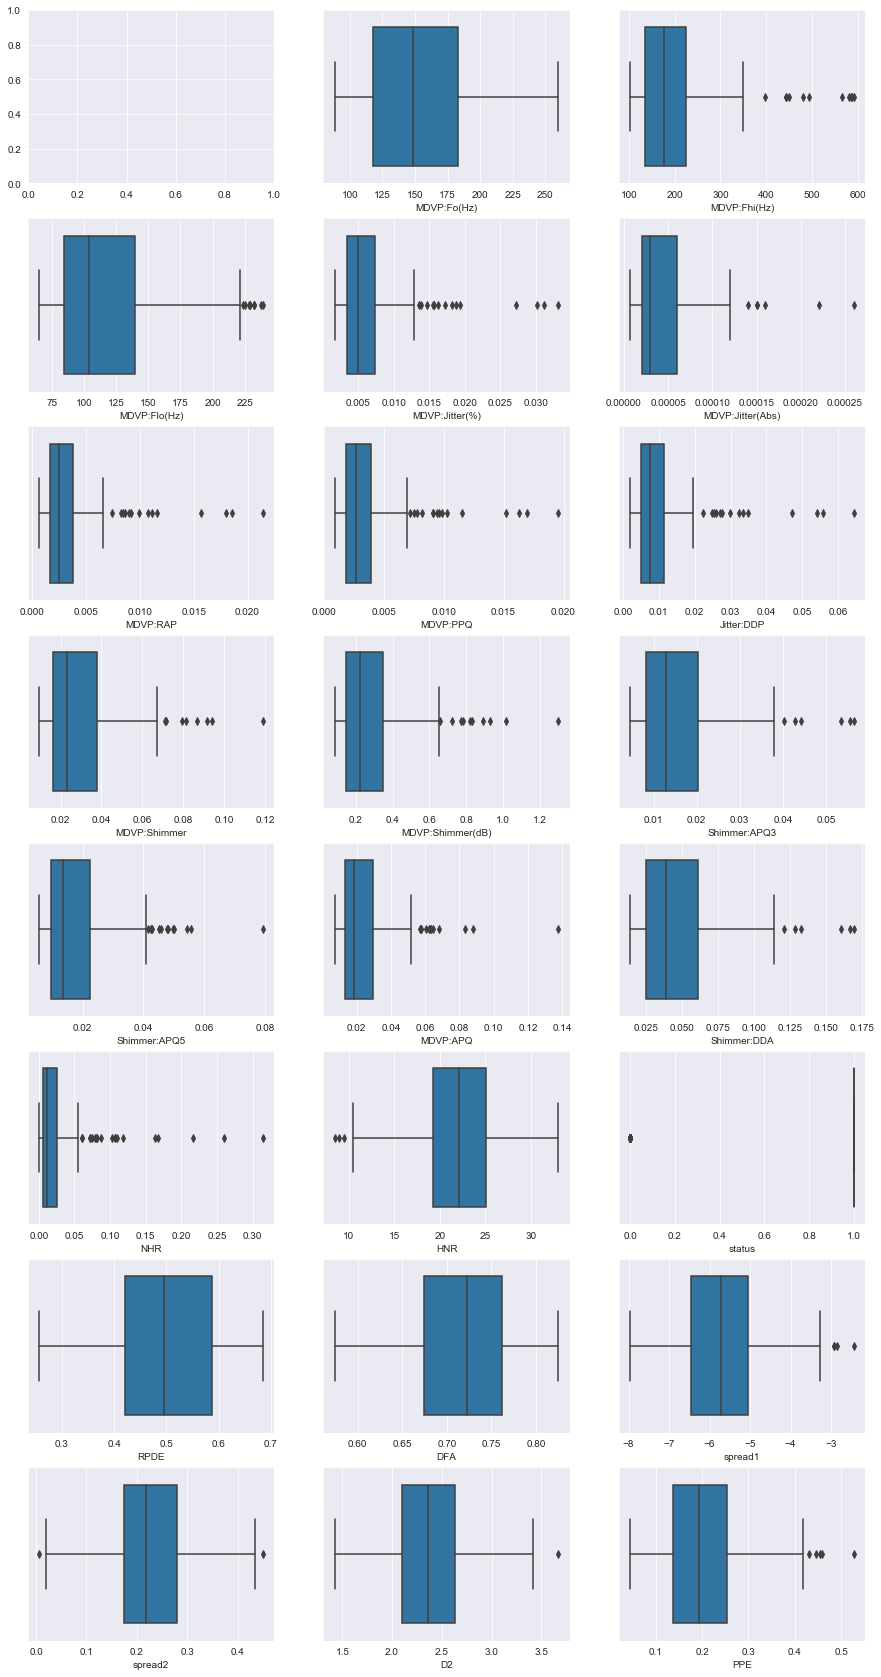

In [137]:
sns.set_style('darkgrid')
fig,axes=plt.subplots(8,3,figsize=(15,30))
axes=axes.flatten()

for i in range(1,len(df.columns)):
    sns.boxplot(df.iloc[:,i],ax=axes[i],data=df)

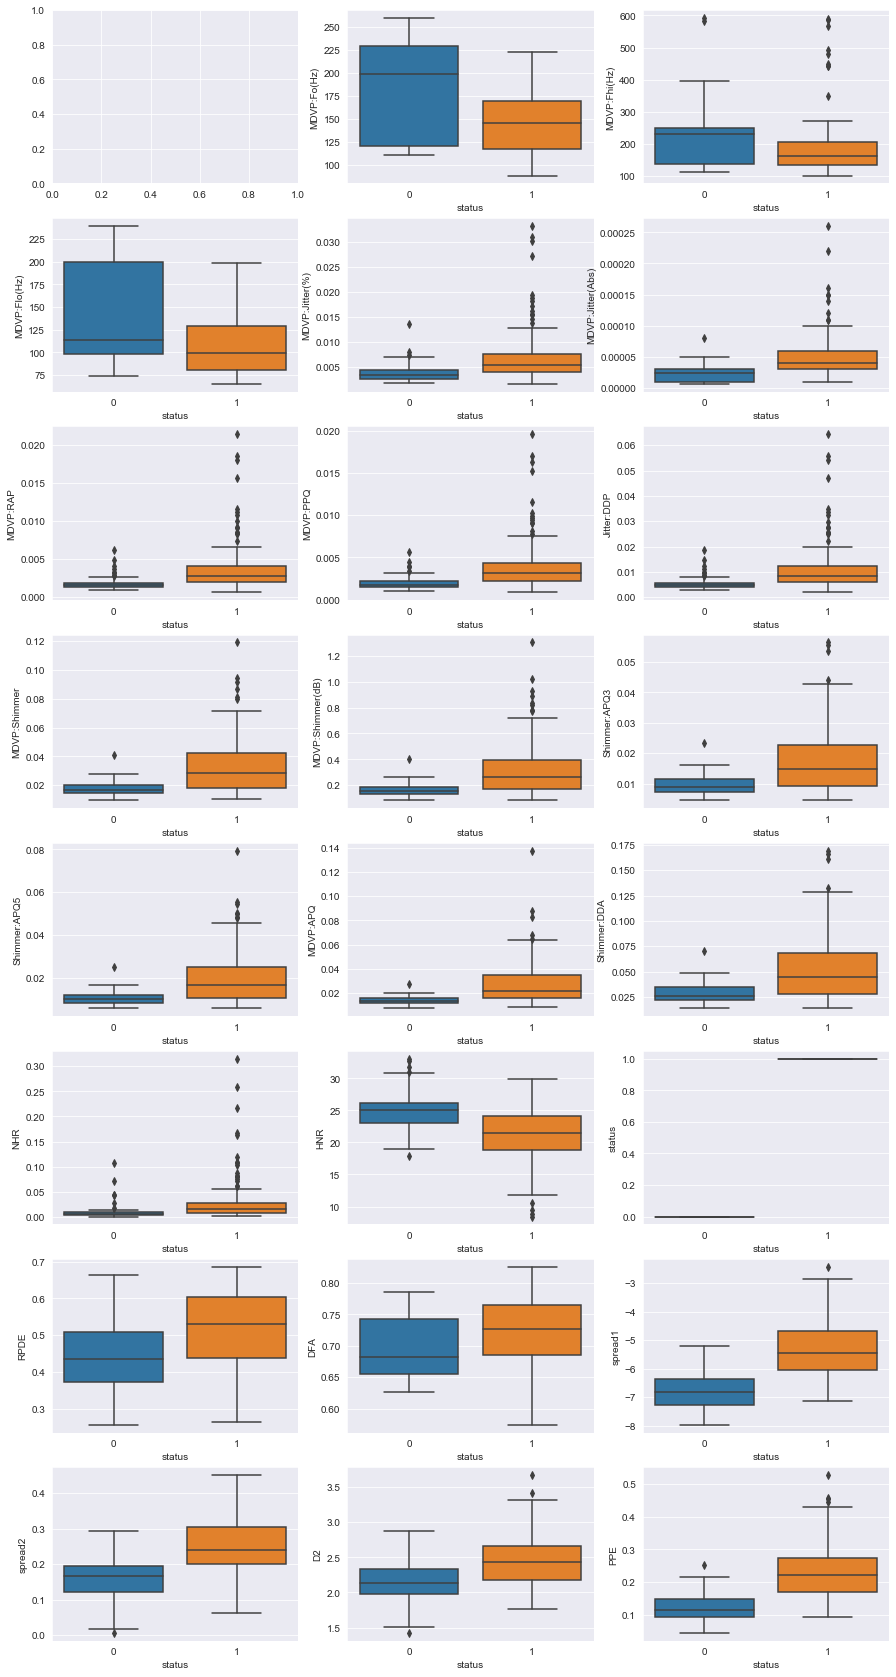

In [138]:
sns.set_style('darkgrid')
fig,axes=plt.subplots(8,3,figsize=(15,30))
axes=axes.flatten()

for i in range(1,len(df.columns)):
    sns.boxplot(x='status',y=df.iloc[:,i],ax=axes[i],data=df)

### Q7. Are there any strong correlations among the independent features?

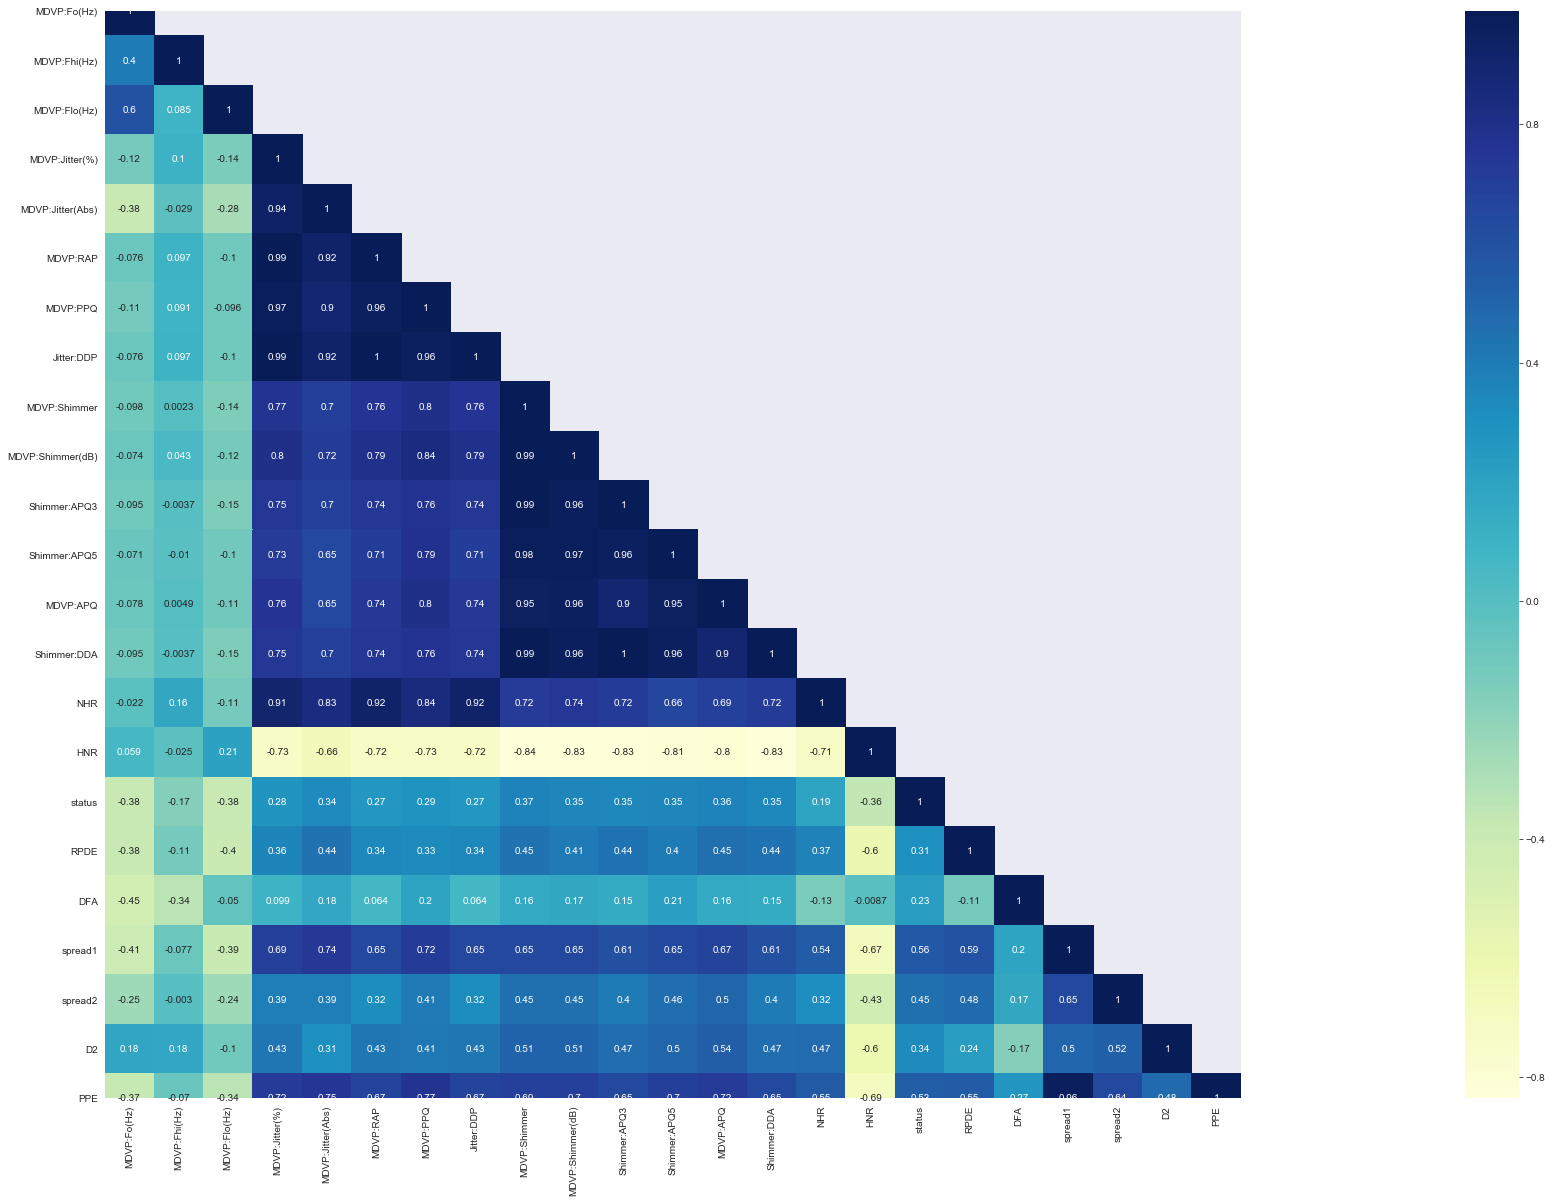

In [139]:
cor=df.corr()
mask=np.array(cor)
mask[np.tril_indices_from(mask)]=False
fig,ax= plt.subplots()
fig.set_size_inches(80,20)
sns.heatmap(cor,annot=True,mask=mask,vmax=.99, square=True, cmap="YlGnBu")
plt.show()

### Q8. Split dataset into training & test dataset  

In [140]:
X=df.drop(['name','status'],axis=1)
y=df['status']

In [141]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

### Q9. Create a default decision tree model using criterion = Entropy 

In [142]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [143]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [144]:
y_train_pred=DT.predict(X_train)
y_test_pred=DT.predict(X_test)

y_train_prob=DT.predict_proba(X_train)[:,1]
y_test_prob=DT.predict_proba(X_test)[:,1]

print('Accuracy of training dataset for default Decision Tree:',accuracy_score(y_train,y_train_pred))
print('Accuracy of testing dataset for default Decision Tree:',accuracy_score(y_test,y_test_pred))

print('\n')
print('AUC score of training dataset for default Decision Tree:',roc_auc_score(y_train,y_train_prob))
print('AUC score of testing dataset for default Decision Tree:',roc_auc_score(y_test,y_test_prob))

Accuracy of training dataset for default Decision Tree: 1.0
Accuracy of testing dataset for default Decision Tree: 0.864406779661017


AUC score of training dataset for default Decision Tree: 1.0
AUC score of testing dataset for default Decision Tree: 0.8578595317725751


## Q10.  Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? 

In [145]:
from sklearn.model_selection import RandomizedSearchCV

In [146]:
from scipy.stats import randint as sp_randint
DT=DecisionTreeClassifier()

params={'max_depth':sp_randint(1,50),
       'min_samples_leaf':sp_randint(1,20)}

rsearch_DT=RandomizedSearchCV(DT,param_distributions=params,return_train_score=True,n_iter=50,n_jobs=-1
                             ,random_state=3,cv=5,scoring='roc_auc')

rsearch_DT.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CD8683F708>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CD8683F948>},
          pre_dispatch='2*n_jobs', random_state=3, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=0)

In [147]:
rsearch_DT.best_params_

{'max_depth': 19, 'min_samples_leaf': 12}

In [150]:
DT_optimized=DecisionTreeClassifier(**rsearch_DT.best_params_,criterion='entropy')
DT_optimized.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=19,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=12, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [151]:
y_train_pred=DT_optimized.predict(X_train)
y_test_pred=DT_optimized.predict(X_test)

y_train_prob=DT_optimized.predict_proba(X_train)[:,1]
y_test_prob=DT_optimized.predict_proba(X_test)[:,1]

print('Accuracy of training dataset for optimized Decision Tree:',accuracy_score(y_train,y_train_pred))
print('Accuracy of testing dataset for optimized Decision Tree:',accuracy_score(y_test,y_test_pred))

print('\n')
print('AUC score of training dataset for optimized Decision Tree:',roc_auc_score(y_train,y_train_prob))
print('AUC score of testing dataset for optimized Decision Tree:',roc_auc_score(y_test,y_test_prob))

Accuracy of training dataset for optimized Decision Tree: 0.9044117647058824
Accuracy of testing dataset for optimized Decision Tree: 0.7966101694915254


AUC score of training dataset for optimized Decision Tree: 0.9676096181046675
AUC score of testing dataset for optimized Decision Tree: 0.8595317725752508


### Q11. Implement a Random Forest model. What is the optimal number of trees that gives the best result?

In [152]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [153]:
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

y_train_prob=rf.predict_proba(X_train)[:,1]
y_test_prob=rf.predict_proba(X_test)[:,1]

print('Accuracy of training dataset for default Random Forest:',accuracy_score(y_train,y_train_pred))
print('Accuracy of testing dataset for default Random Forest:',accuracy_score(y_test,y_test_pred))

print('\n')
print('AUC score of training dataset for default Random Forest:',roc_auc_score(y_train,y_train_prob))
print('AUC score of testing dataset for default Random Forest:',roc_auc_score(y_test,y_test_prob))

Accuracy of training dataset for default Random Forest: 1.0
Accuracy of testing dataset for default Random Forest: 0.7796610169491526


AUC score of training dataset for default Random Forest: 1.0
AUC score of testing dataset for default Random Forest: 0.9147157190635451


In [154]:
from scipy.stats import randint as sp_randint
rf=RandomForestClassifier()

params={'n_estimators':sp_randint(1,500),
        'max_depth':sp_randint(1,50),
       'min_samples_leaf':sp_randint(1,20)}

rsearch_RF=RandomizedSearchCV(rf,param_distributions=params,return_train_score=True,n_iter=50,n_jobs=-1
                             ,random_state=3,cv=5,scoring='roc_auc')

rsearch_RF.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CD8C0C3088>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CD8C0C3108>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CD8C0C3408>},
          pre_dispatch='2*n_jobs', random_state=3, refit=True,
          return_train_score=True, scoring='roc_auc', verbos

In [155]:
rsearch_RF.best_params_

{'max_depth': 27, 'min_samples_leaf': 19, 'n_estimators': 61}

In [156]:
rf_optimized=RandomForestClassifier(**rsearch_RF.best_params_)
rf_optimized.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=27, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=19, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=61, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [157]:
y_train_pred=rf_optimized.predict(X_train)
y_test_pred=rf_optimized.predict(X_test)

y_train_prob=rf_optimized.predict_proba(X_train)[:,1]
y_test_prob=rf_optimized.predict_proba(X_test)[:,1]

print('Accuracy of training dataset for optimized Random Forest:',accuracy_score(y_train,y_train_pred))
print('Accuracy of testing dataset for optimized Random Forest:',accuracy_score(y_test,y_test_pred))

print('\n')
print('AUC score of training dataset for optimized Random Forest:',roc_auc_score(y_train,y_train_prob))
print('AUC score of testing dataset for optimized Random Forest:',roc_auc_score(y_test,y_test_prob))

Accuracy of training dataset for optimized Random Forest: 0.8676470588235294
Accuracy of testing dataset for optimized Random Forest: 0.7796610169491526


AUC score of training dataset for optimized Random Forest: 0.9468175388967468
AUC score of testing dataset for optimized Random Forest: 0.9080267558528429
